In [1]:
import pandas as pd
from pandas import DataFrame, Series

In [2]:
titanic_df = pd.read_csv('train.csv')

In [5]:
titanic_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# SibSp = does they have sibling, Parch = Parent or children on board
# 0 = not survived, 1 = survived as survived column

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# Cabin info is less. (more NaNs)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

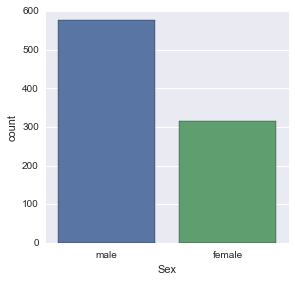

In [23]:
sns.factorplot('Sex', data = titanic_df, kind = 'count') #as default kind is a point.

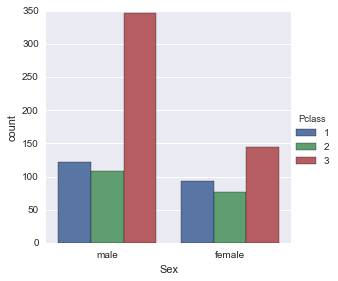

In [25]:
sns.factorplot('Sex', data = titanic_df, hue = 'Pclass', kind = 'count')

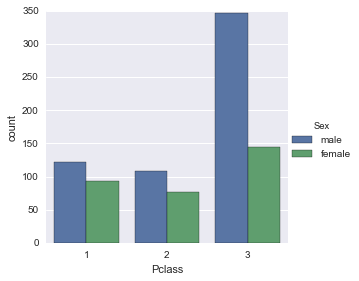

In [26]:
sns.factorplot('Pclass', data = titanic_df, hue = 'Sex', kind = 'count')

In [27]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [28]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)
# we did axis = 1 because it is col, not index! (person will be a new col for dataframe)

In [29]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


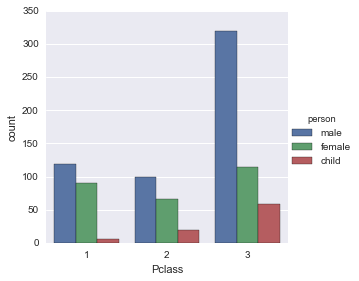

In [44]:
sns.factorplot('Pclass', data = titanic_df, hue = 'person', kind = 'count')

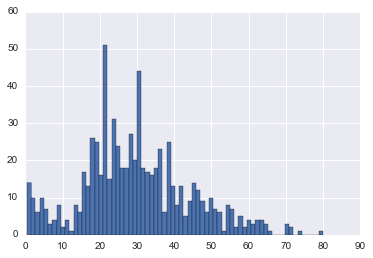

In [45]:
titanic_df['Age'].hist(bins=70) #bins = kutular, iyi bir graph için çok bin

In [46]:
titanic_df['Age'].mean()

29.69911764705882

In [47]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

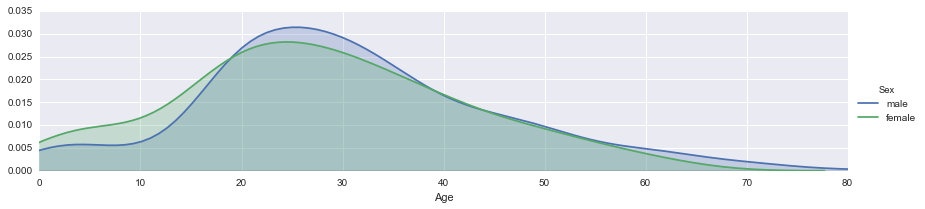

In [48]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4) #aspect ratio is 4 to look nice

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend() # sağdaki male, female gösterimi için

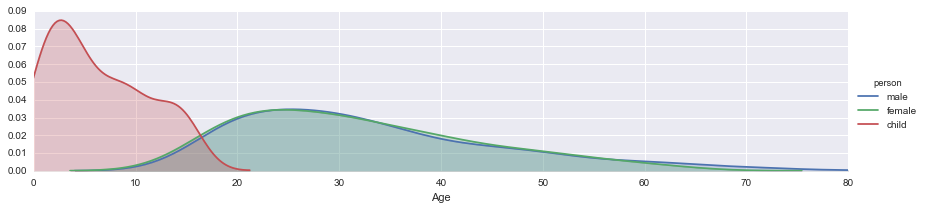

In [49]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4) #aspect ratio is 4 to look nice

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend() # sağdaki male, female gösterimi için

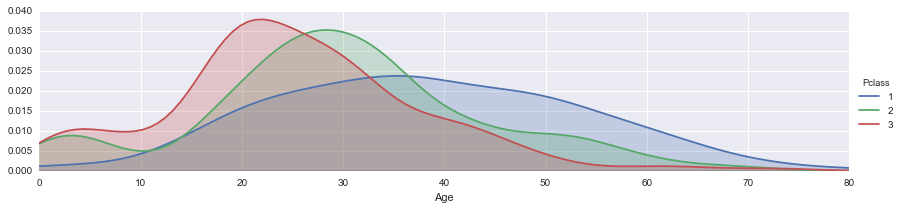

In [50]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4) #aspect ratio is 4 to look nice

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend() # sağdaki male, female gösterimi için

In [51]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [52]:
deck = titanic_df['Cabin'].dropna()

In [56]:
deck.head() # sadece ön tarafı hepsi değil !

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

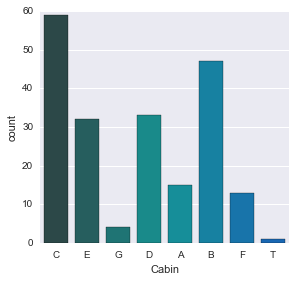

In [62]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, palette = 'winter_d', kind = 'count')

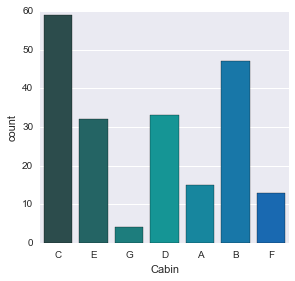

In [66]:
# t is awkward (?)

cabin_df = cabin_df[cabin_df.Cabin != 'T'] # 'Cabin' as col value.
sns.factorplot('Cabin', data = cabin_df, palette = 'winter_d', kind = 'count')

In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [70]:
#embarked = indicates cities of england that passengers came from

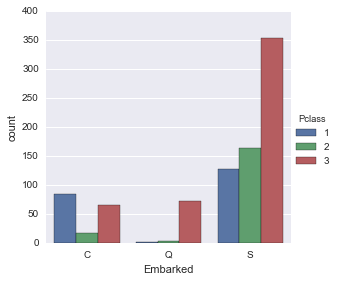

In [75]:
sns.factorplot('Embarked', data = titanic_df, hue = 'Pclass', order = ['C', 'Q', 'S'], 
                kind = 'count')

In [77]:
# Who was alone and who was with family?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [78]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [83]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [84]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


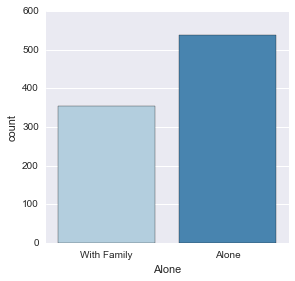

In [86]:
sns.factorplot('Alone', data = titanic_df, palette = 'Blues', kind = 'count')

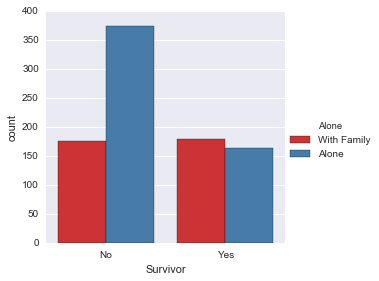

In [89]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'No', 1: 'Yes'})

sns.factorplot('Survivor', data = titanic_df, palette = 'Set1', kind = 'count')

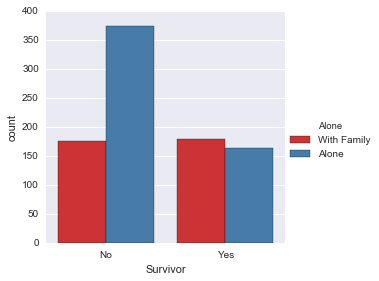

In [90]:
sns.factorplot('Survivor', data = titanic_df, hue = 'Alone', palette = 'Set1', kind = 'count')

In [92]:
# Hue, karşılaştırmamızı sağlıyor. Ekstra parametre ekliyor

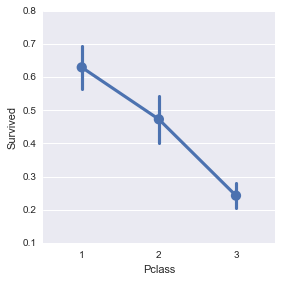

In [103]:
sns.factorplot('Pclass', 'Survived', data = titanic_df)

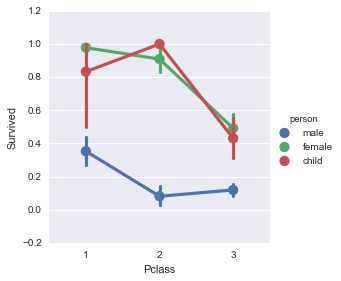

In [101]:
sns.factorplot('Pclass','Survived', hue = 'person', data = titanic_df)

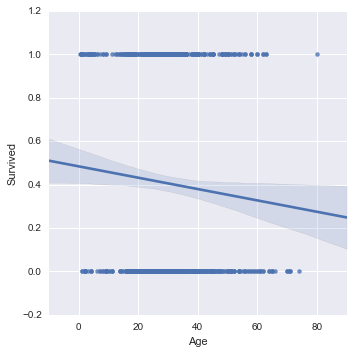

In [100]:
sns.lmplot('Age', 'Survived', data = titanic_df)

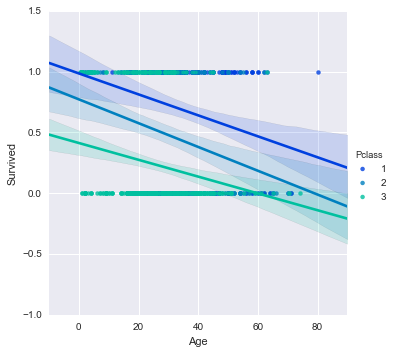

In [105]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette ='winter')

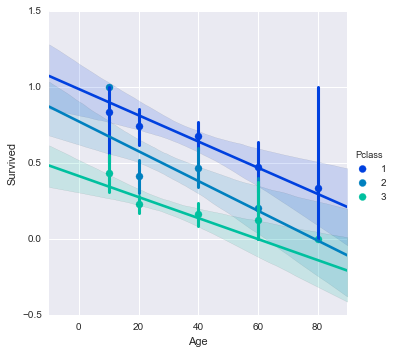

In [107]:
generations = [10,20,40,60,80] # bins

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', 
           x_bins = generations)

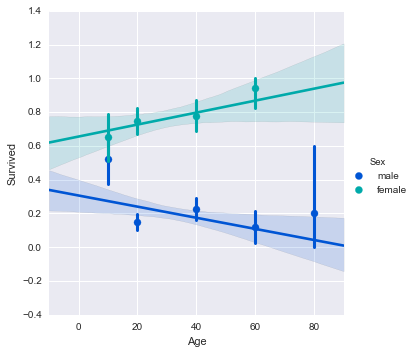

In [108]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'winter', 
           x_bins = generations)

In [122]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,C


In [145]:
def deck_Calc(cabin):
    deck = str(cabin)
    if deck != np.nan:
        return deck[0]
    else:
        return 'Not-Specified'

In [153]:
titanic_df['Deck'] = titanic_df['Cabin'].apply(deck_Calc)

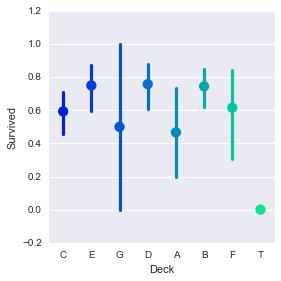

In [164]:
sns.factorplot('Deck', 'Survived', data = titanic_df[titanic_df.Deck != 'n'], palette = 'winter')

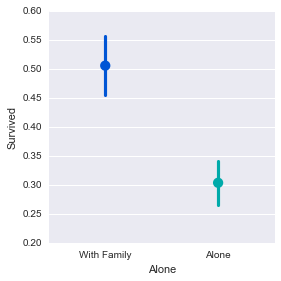

In [166]:
sns.factorplot('Alone', 'Survived', data = titanic_df, palette = 'winter')